In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: regular expression
# @created date: 2019/10/14
# @last modififcation: 2019/10/14

## re.match()函数  
re.match()函数尝试从字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，该函数返回None。函数语法：  
```python
    re.match(pattern, string, flags=0)

```

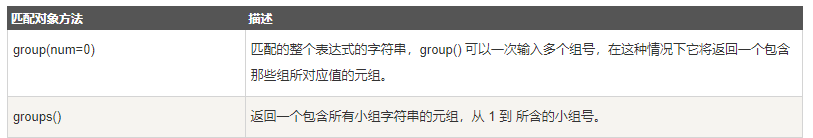  
匹配成功则返回一个匹配的对象，否则返回None。我们可以使用group(num)或者groups()匹配对象函数来获取匹配表达式。  
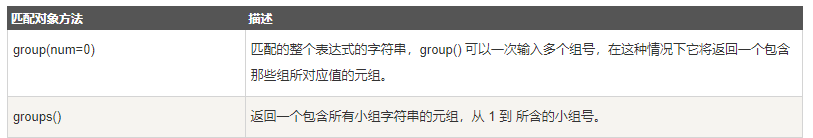

In [2]:
import re

In [5]:
print(re.match('www', 'www.github.com').span())

(0, 3)


In [7]:
print(re.match('com', 'www.github.com'))

None


In [8]:
line = 'Cats are smarter than dogs'
match_obj = re.match(r'(.*) are (.*?) .*', line, re.M | re.I)
if match_obj:
    print(f'match_obj.group(): {match_obj.group()}')
    print(f'match_obj.group(1): {match_obj.group(1)}')
    print(f'match_obj.group(2) : {match_obj.group(2)}')
else:
    print('No matching!!!')

match_obj.group(): Cats are smarter than dogs
match_obj.group(1): Cats
match_obj.group(2) : smarter


### re.search()函数  
re.search()扫描整个字符串，并返回第一个成功的匹配。函数语法： ```python
   re.search(pattern, string, flags=0)
```
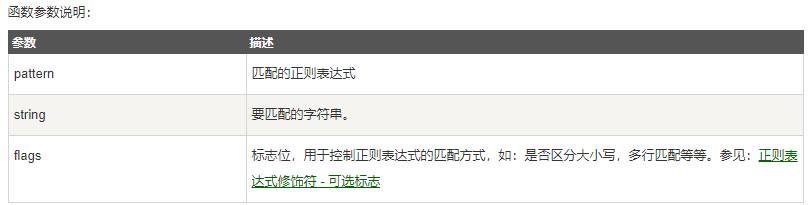

In [11]:
# 在起始位置匹配到
print(re.search('www', 'www.github.com').span())
# 不在起始位置匹配到
print(re.search('com', 'www.github.com').span())

(0, 3)
(11, 14)


In [12]:
line = 'Cats are smarter than dogs'
match_obj = re.search(r'(.*) are (.*?) .*', line, re.M | re.I)
if match_obj:
    print(f'match_obj.group(): {match_obj.group()}')
    print(f'match_obj.group(1): {match_obj.group(1)}')
    print(f'match_obj.group(2) : {match_obj.group(2)}')
else:
    print('No matching!!!')

match_obj.group(): Cats are smarter than dogs
match_obj.group(1): Cats
match_obj.group(2) : smarter


### re.match与re.search的区别  
re.match()只匹配字符串的开始，如果字符串开始不符合正则表达式，则匹配失败，函数返回None；而re.search()匹配整个字符串，直到找到一个匹配。

In [13]:
line = 'Cats are smarter than dogs'
match_obj = re.match('dogs', line, re.M | re.I)
if match_obj:
    print(f'match --> match_obj.group(): {match_obj.group()}')
else:
    print('No matching!!!')
    
match_obj = re.search('dogs', line, re.M | re.I)
if match_obj:
    print(f'match --> match_obj.group(): {match_obj.group()}')
else:
    print('No matching!!!')
        

No matching!!!
match --> match_obj.group(): dogs


### 检索和替换  
Python内置的re模块提供了re.sub()函数用于替换字符串中的匹配项。语法：  
```python
   re.sub(pattern, repl, string, count=0, flags=0)
    
参数：
    pattern : 正则中的模式字符串。
    repl : 替换的字符串，也可为一个函数。
    string : 要被查找替换的原始字符串。
    count : 模式匹配后替换的最大次数，默认 0 表示替换所有的匹配。
    flags : 编译时用的匹配模式，数字形式。
前三个为必选参数，后两个为可选参数。

```

In [14]:
phone = '2019-959-987 # this is a phone number'

#删除注释
num = re.sub(r'#.*', '', phone)
print('phone: ', num)


phone:  2019-959-987 


In [18]:
# 去掉非数字的内容，这里是‘-’
num = re.sub(r'\D', '', phone)
#或者：num = re.sub(r'[^0-9]+', '', phone)
print(num)

2019959987


### 当repl为函数时  
以下实例是将匹配到的数字乘以2：

In [19]:
def double(matched):
    value = int(matched.group('value'))
    return str(2 * value)

In [25]:
s = 'ASD12ESDFA4SFDA5SDF67DS8'
# (?P)为命名捕获，名称为value
print(re.sub('(?P<value>\d+)', double, s))

ASD24ESDFA8SFDA10SDF134DS16


### compile()函数  
compile()用于编译一个正则表达式，生成一个正则表达式对象，拱match()函数和search()函数使用。语法：  
```python
   re.compile(pattern[,flags])
    
参数：
    pattern : 一个字符串形式的正则表达式
    flags 可选，表示匹配模式，比如忽略大小写，多行模式等，具体参数为：
        re.I 忽略大小写
        re.L 表示特殊字符集 \w, \W, \b, \B, \s, \S 依赖于当前环境
        re.M 多行模式
        re.S 即为' . '并且包括换行符在内的任意字符（' . '不包括换行符）
        re.U 表示特殊字符集 \w, \W, \b, \B, \d, \D, \s, \S 依赖于 Unicode 字符属性数据库
        re.X 为了增加可读性，忽略空格和' # '后面的注释

```


In [29]:
# 至少匹配一个数字
pattern = re.compile(r'\d+')

# 只查找头部，显然没有匹配
m = pattern.match('one12two3four56fivesix')
print(m)

# 匹配到12345
m = pattern.match('12345one12two3four56fivesix')
print(m)

# 从e开始匹配，显然没匹配到
m = pattern.match('one12two3four56fivesix', 2, 10)
print(m)

# 从第三个位置，也就是字符'1'开始匹配，显然会匹配到12
m = pattern.match('one12two3four56fivesix', 3, 10)
print(m)

None
<re.Match object; span=(0, 5), match='12345'>
None
<re.Match object; span=(3, 5), match='12'>


In [33]:
m.start()

3

In [34]:
m.end()

5

In [35]:
m.span()

(3, 5)

```python
在上面，当匹配成功时返回一个 Match 对象，其中：
group([group1, …]) 方法用于获得一个或多个分组匹配的字符串，当要获得整个匹配的子串时，可直接使用 group() 或 group(0)；

start([group]) 方法用于获取分组匹配的子串在整个字符串中的起始位置（子串第一个字符的索引），参数默认值为 0；

end([group]) 方法用于获取分组匹配的子串在整个字符串中的结束位置（子串最后一个字符的索引+1），参数默认值为 0；

span([group]) 方法返回 (start(group), end(group))。


```

再看一个例子：

In [36]:
# re.I表示忽略大小写
pattern = re.compile(r'([a-z]+) ([a-z]+)', re.I)

In [37]:
m = pattern.match('Hello World Wide Web')

In [38]:
print(m)

<re.Match object; span=(0, 11), match='Hello World'>


In [39]:
# 返回匹配成功的整个字符串
m.group()

'Hello World'

In [40]:
# 或者
m.group(0)

'Hello World'

In [41]:
# 返回第一个分组匹配到的字符串
m.group(1)

'Hello'

In [42]:
# 返回第二个分组匹配到的字符串
m.group(2)

'World'

In [43]:
# 返回第一个分组匹配成功的子串的索引
m.span(1)

(0, 5)

In [44]:
# 返回第二个分组匹配成功的子串的索引
m.span(2)

(6, 11)

In [45]:
# 等价于m.group(1), m.group(2)
m.groups()

('Hello', 'World')

In [46]:
# 该例子中不存在第三个分组
m.group(3)

IndexError: no such group

### findall()函数  
在字符串中找到正则表达式所匹配到的所有子串，如果没有匹配到的，返回空列表。语法： 
```python
   re.findall(string[, endpos])
 
参数：
    string：待匹配的字符串。
    pos：可选参数，指定字符串的起始位置，默认为 0。
    endpos：可选参数，指定字符串的结束位置，默认为字符串的长度。

```

In [47]:
pattern = re.compile(r'\d+')


In [51]:
res1 = pattern.findall('apple is 123g than a peach that weighs 12g')
print(res1)

['123', '12']


In [52]:
res2 = pattern.findall('run88oob123google456', 0, 10)
print(res2)

['88', '12']


### re.finditer()  
和 findall 类似，在字符串中找到正则表达式所匹配的所有子串，并把它们作为一个迭代器返回。语法：  
```python
   re.finditer(pattern, string, flags=0)

```
参数：  
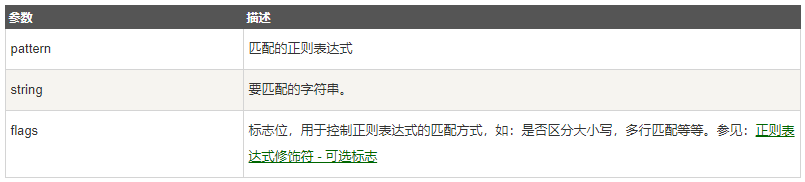

In [54]:
iter = re.finditer(r'\d+', '12asfd1232134dsafds4')
for m in iter:
    print(m.group())

12
1232134
4


### re.split()  
split()函数能够匹配的子串将字符串分割后返回列表。语法：  
```python
re.split(pattern, string, maxsplit=0, flags=0)
```
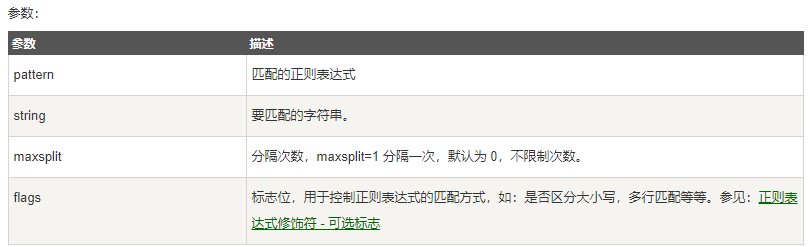

In [55]:
re.split(r'\D+', 'one1two2three3four4')

['', '1', '2', '3', '4']

In [56]:
re.split('(\W+)', 'one, two, three.')

['one', ', ', 'two', ', ', 'three', '.', '']

In [58]:
# 只分割一次
re.split('(\W+)', 'one, two, three.', 1)

['one', ', ', 'two, three.']

### 正则表达式对象  
#### re.RegexObject  
re.compile()函数返回RegexObject对象。  
  
#### re.MatchObject
group()函数返回被匹配的字符串：  
&emsp;&emsp;start() 返回匹配开始的位置  
&emsp;&emsp;end() 返回匹配结束的位置  
&emsp;&emsp;span() 返回一个元组包含匹配 (开始,结束) 的位置  


### 正则表达式修饰符 - 可选标志  
正则表达式可以包含一些可选标志修饰符来控制匹配的模式。修饰符被指定为一个可选的标志。多个标志可以通过按位 OR(|) 它们来指定。如 re.I | re.M 被设置成 I 和 M 标志：  
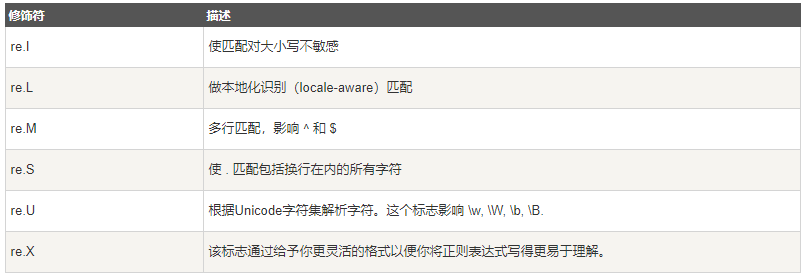

### 正则表达式模式  
模式字符串使用特殊的语法来表示一个正则表达式：  
字母和数字表示他们自身。一个正则表达式模式中的字母和数字匹配同样的字符串。  
  
多数字母和数字前加一个反斜杠时会拥有不同的含义。  
  
标点符号只有被转义时才匹配自身，否则它们表示特殊的含义。  
  
反斜杠本身需要使用反斜杠转义。  
  
由于正则表达式通常都包含反斜杠，所以你最好使用原始字符串来表示它们。模式元素(如 r'\t'，等价于 \\t )匹配相应的特殊字符。  
  
下表列出了正则表达式模式语法中的特殊元素。如果你使用模式的同时提供了可选的标志参数，某些模式元素的含义会改变。  
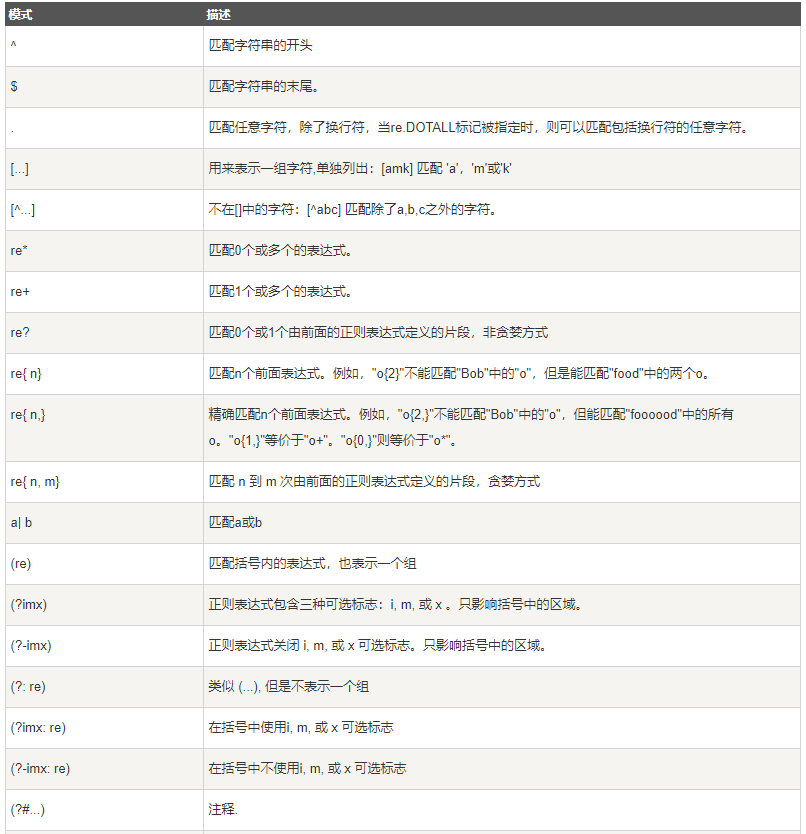
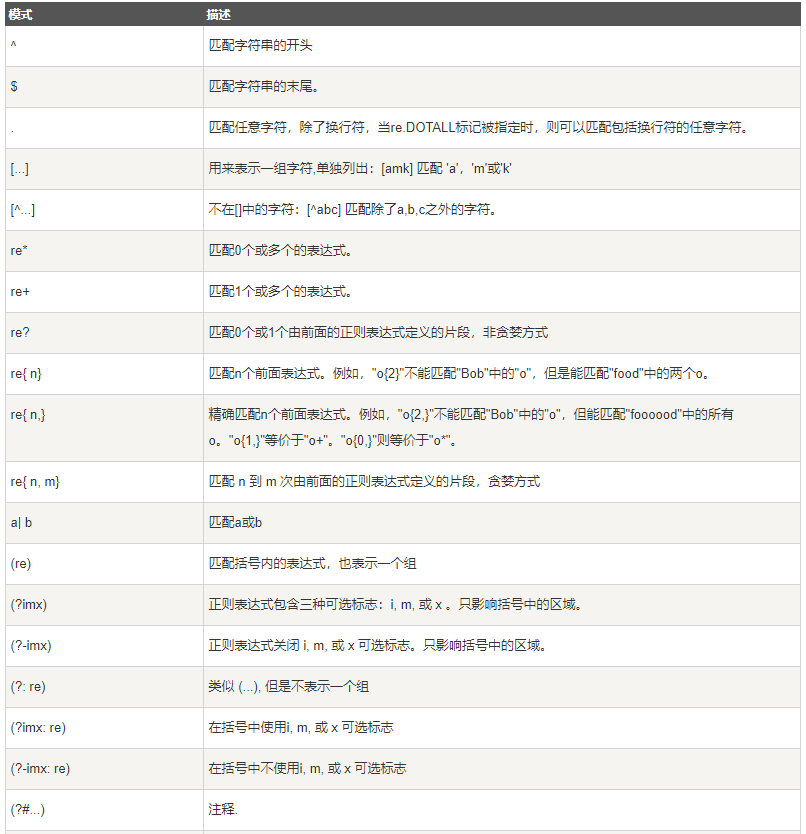


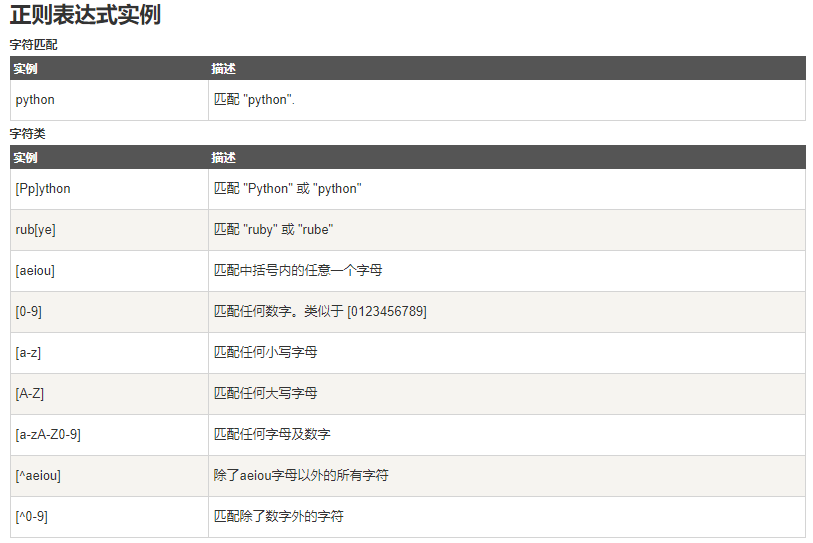

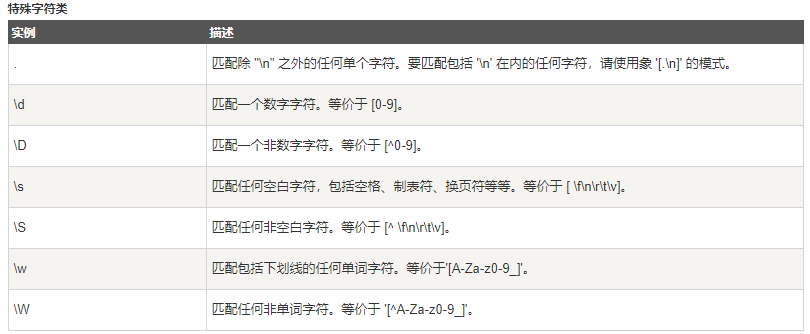